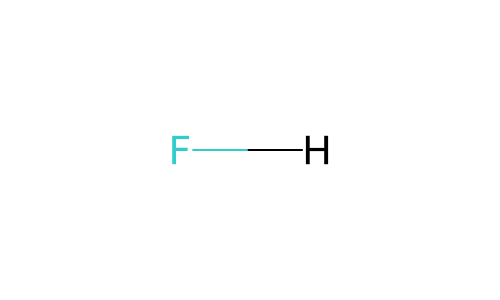

In [1]:
from openff.toolkit.topology import Molecule as OFFMolecule
off_dmso = OFFMolecule.from_smiles("F")
off_dmso.visualize(backend="rdkit")

In [2]:
import psiresp
off_dmso.generate_conformers(n_conformers=1)
qc_dmso = off_dmso.to_qcschema()
dmso = psiresp.Molecule(qcmol=qc_dmso, optimize_geometry=True)
print(dmso.conformers)

[]


In [3]:
from qcfractal import FractalSnowflakeHandler, FractalSnowflake
server = FractalSnowflakeHandler()
client = server.client()
print(client)


{'retcode': 0, 'stdout': 'The files belonging to this database system will be owned by user "lily".\nThis user must also own the server process.\n\nThe database cluster will be initialized with locale "en_AU.UTF-8".\nThe default database encoding has accordingly been set to "UTF8".\nThe default text search configuration will be set to "english".\n\nData page checksums are disabled.\n\nfixing permissions on existing directory /var/folders/rv/j6lbln6j0kvb5svxj8wflc400000gn/T/tmp8czpyoaw ... ok\ncreating subdirectories ... ok\nselecting dynamic shared memory implementation ... posix\nselecting default max_connections ... 100\nselecting default shared_buffers ... 128MB\nselecting default time zone ... America/Los_Angeles\ncreating configuration files ... ok\nrunning bootstrap script ... ok\nperforming post-bootstrap initialization ... ok\nsyncing data to disk ... ok\n\n\nSuccess. You can now start the database server using:\n\n    /Users/lily/anaconda3/envs/psiresp-3.8/bin/pg_ctl -D /var/f

In [4]:
import qcfractal.interface as ptl

mol = ptl.Molecule.from_data("""
O 0 0 0
H 0 0 2
H 0 2 0
units bohr
""")
mol



NGLWidget()

In [5]:
spec = {
    "keywords": None,
    "qc_spec": {
        "driver": "gradient",
        "method": "b3lyp",
        "basis": "6-31g",
        "program": "psi4"
    },
}

# Ask the server to compute a new computation
r = client.add_procedure("optimization", "geometric", spec, [mol])
print(r)
print(r.ids)



DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): localhost:60680
DEBUG:urllib3.connectionpool:https://localhost:60680 "POST /task_queue HTTP/1.1" 200 127
ComputeResponse(nsubmitted=1 nexisting=0)
['1']


In [8]:
proc = client.query_procedures(id=r.ids)[0]
proc

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): localhost:60680
DEBUG:urllib3.connectionpool:https://localhost:60680 "GET /procedure HTTP/1.1" 200 515


OptimizationRecord(id='1', status='INCOMPLETE')

In [31]:
proc.show_history()

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [16]:
client.await_results()

AttributeError: 'FractalClient' object has no attribute 'await_results'

In [3]:

geometry_options = psiresp.QMGeometryOptimizationOptions(
    method="b3lyp", basis="sto-3g",
)
esp_options = psiresp.QMEnergyOptions(
    method="b3lyp", basis="sto-3g",
)
job = psiresp.Job(molecules=[dmso],
                  qm_optimization_options=geometry_options,
                  qm_esp_options=esp_options,
                  )
job.run(client=client)
print(dmso.charges)

{'retcode': 0, 'stdout': 'The files belonging to this database system will be owned by user "lily".\nThis user must also own the server process.\n\nThe database cluster will be initialized with locale "en_AU.UTF-8".\nThe default database encoding has accordingly been set to "UTF8".\nThe default text search configuration will be set to "english".\n\nData page checksums are disabled.\n\nfixing permissions on existing directory /var/folders/rv/j6lbln6j0kvb5svxj8wflc400000gn/T/tmpb1r3fxe8 ... ok\ncreating subdirectories ... ok\nselecting dynamic shared memory implementation ... posix\nselecting default max_connections ... 100\nselecting default shared_buffers ... 128MB\nselecting default time zone ... America/Los_Angeles\ncreating configuration files ... ok\nrunning bootstrap script ... ok\nperforming post-bootstrap initialization ... ok\nsyncing data to disk ... ok\n\n\nSuccess. You can now start the database server using:\n\n    /Users/lily/anaconda3/envs/psiresp-3.8/bin/pg_ctl -D /var/f

generate-conformers: 100%|███████████████████████| 1/1 [00:00<00:00, 115.78it/s]

DEBUG:psiresp.job:Job has total 1 conformers
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): localhost:59264
DEBUG:urllib3.connectionpool:https://localhost:59264 "POST /keyword HTTP/1.1" 200 99
DEBUG:psiresp.qm:Submitting specification {'program': 'psi4', 'method': 'b3lyp', 'basis': 'sto-3g', 'driver': 'gradient', 'keywords': '1', 'protocols': {'wavefunction': 'orbitals_and_eigenvalues'}} for 1 molecules
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): localhost:59264
DEBUG:urllib3.connectionpool:https://localhost:59264 "POST /task_queue HTTP/1.1" 200 127
DEBUG:psiresp.qm:Received response ComputeResponse(nsubmitted=1 nexisting=0) with ids ['1']


KeyboardInterrupt: 

In [5]:
client.query_procedures(id=["1"])

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): localhost:59264


KeyboardInterrupt: 